# Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
customer = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Cleaning

In [8]:
# drop Column
customer.drop(['customerID'],axis =1, inplace =True)
customer.drop(['Dependents'], axis =1, inplace = True)
customer.drop(['MultipleLines'], axis =1, inplace =True)
customer.drop(['OnlineBackup'], axis =1, inplace =True)
customer.drop(['DeviceProtection'], axis =1, inplace = True)
customer.drop(['PaperlessBilling'], axis=1, inplace =True)
customer.drop(['PaymentMethod'], axis=1, inplace =True)

In [9]:
customer

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,1,No,DSL,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,34,Yes,DSL,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,2,Yes,DSL,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,45,No,DSL,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,2,Yes,Fiber optic,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,24,Yes,DSL,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,72,Yes,Fiber optic,No,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,11,No,DSL,Yes,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,4,Yes,Fiber optic,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1 = ['gender', 'Partner', 'PhoneService', 'InternetService', 'OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in list1:
    customer[i] = le.fit_transform(customer[i].astype(str))

In [71]:
customer

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,0,0,0,0,0,446,1675,0
1,1,0,0,34,1,0,2,0,0,0,1,802,520,0
2,1,0,0,2,1,0,2,0,0,0,0,740,635,1
3,1,0,0,45,0,0,2,2,0,0,1,570,448,0
4,0,0,0,2,1,1,0,0,0,0,0,1033,6449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,24,1,0,2,2,2,2,1,1295,665,0
7039,0,0,1,72,1,1,0,0,2,2,1,59,5221,0
7040,0,0,1,11,0,0,2,0,0,0,0,441,2217,0
7041,1,1,1,4,1,1,0,0,0,0,0,1099,1847,1


# Summary Statistics

In [72]:
customer.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,32.371149,0.903166,0.872923,0.790004,0.797104,0.985376,0.992475,0.690473,783.182877,3234.783189,0.265370
std,0.500013,0.368612,0.499748,24.559481,0.295752,0.737796,0.859848,0.861551,0.885002,0.885091,0.833755,466.006171,1900.777889,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,338.000000,1557.500000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,761.000000,3231.000000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1204.000000,4915.500000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1584.000000,6530.000000,1.000000


In [73]:
customer.skew()

gender            -0.019031
SeniorCitizen      1.833633
Partner            0.067922
tenure             0.239540
PhoneService      -2.727153
InternetService    0.205423
OnlineSecurity     0.416985
TechSupport        0.402365
StreamingTV        0.028486
StreamingMovies    0.014657
Contract           0.630959
MonthlyCharges     0.073255
TotalCharges       0.009418
Churn              1.063031
dtype: float64

# EDA

<AxesSubplot:>

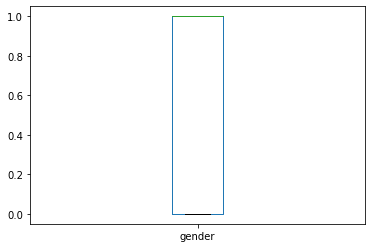

In [18]:
customer['gender'].plot.box()

<AxesSubplot:>

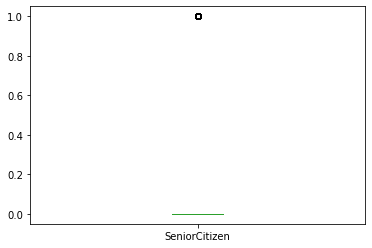

In [19]:
customer['SeniorCitizen'].plot.box()

<AxesSubplot:>

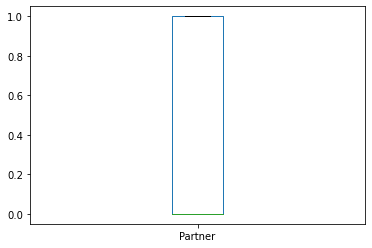

In [20]:
customer['Partner'].plot.box()

<AxesSubplot:>

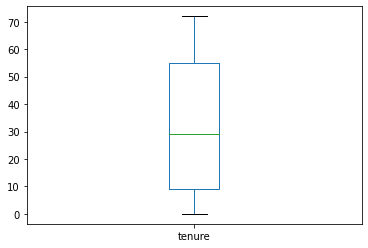

In [21]:
customer['tenure'].plot.box()

<AxesSubplot:>

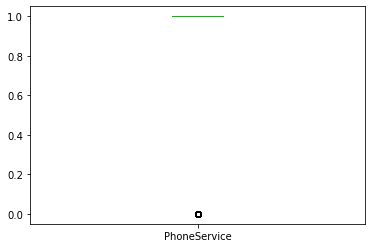

In [22]:
customer['PhoneService'].plot.box()

<AxesSubplot:>

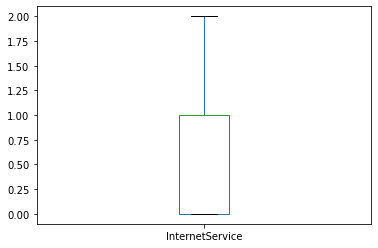

In [23]:
customer['InternetService'].plot.box()

<AxesSubplot:>

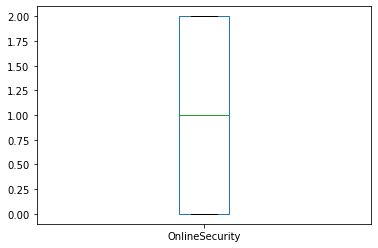

In [24]:
customer['OnlineSecurity'].plot.box()

<AxesSubplot:>

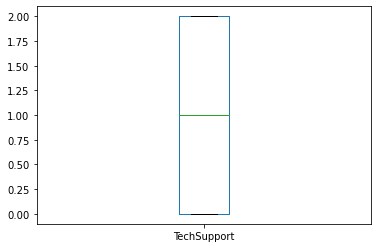

In [25]:
customer['TechSupport'] .plot.box()

<AxesSubplot:>

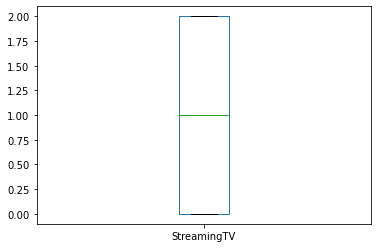

In [26]:
customer['StreamingTV'].plot.box()

<AxesSubplot:>

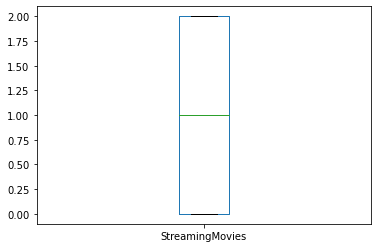

In [27]:
customer['StreamingMovies'].plot.box()

<AxesSubplot:>

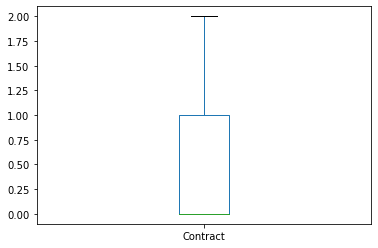

In [28]:
customer['Contract'].plot.box()

<AxesSubplot:>

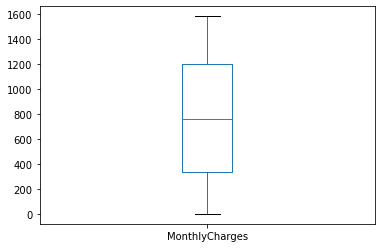

In [74]:
customer['MonthlyCharges'].plot.box()

<AxesSubplot:>

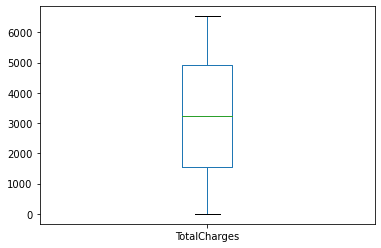

In [75]:
customer['TotalCharges'].plot.box()

<AxesSubplot:>

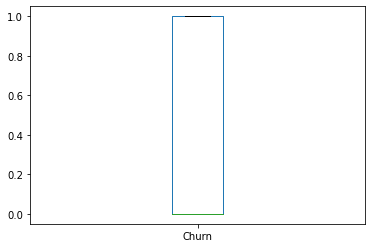

In [35]:
customer['Churn'].plot.box()

# Correlation

In [77]:
customer.corr()

,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.005106,-0.006488,-0.000863,-0.015017,-0.006825,-0.006421,-0.008743,0.000126,-0.001184,-0.005090,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,0.016567,0.008576,-0.032310,-0.128221,-0.151268,0.030776,0.047266,-0.142554,0.109099,0.014869,0.150889
Partner,-0.001808,0.016479,1.000000,0.379697,0.017706,0.000891,0.150828,0.126733,0.137341,0.129574,0.294806,-0.012809,0.056453,-0.150448
tenure,0.005106,0.016567,0.379697,1.000000,0.008448,-0.030359,0.325468,0.322942,0.289373,0.296866,0.671607,-0.077150,0.138936,-0.352229
PhoneService,-0.006488,0.008576,0.017706,0.008448,1.000000,0.387436,-0.015198,-0.019158,0.055353,0.043870,0.002247,0.134896,0.082428,0.011942
InternetService,-0.000863,-0.032310,0.000891,-0.030359,0.387436,1.000000,-0.028416,-0.026047,0.107417,0.098350,0.099721,-0.327075,0.036844,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.325468,-0.015198,-0.028416,1.000000,0.285028,0.044669,0.055954,0.374416,-0.129406,0.017204,-0.289309
TechSupport,-0.006825,-0.151268,0.126733,0.322942,-0.019158,-0.026047,0.285028,1.000000,0.161305,0.161316,0.425367,-0.157243,0.019653,-0.282492
StreamingTV,-0.006421,0.030776,0.137341,0.289373,0.055353,0.107417,0.044669,0.161305,1.000000,0.434772,0.227116,-0.088157,0.067769,-0.036581
StreamingMovies,-0.008743,0.047266,0.129574,0.296866,0.043870,0.098350,0.055954,0.161316,0.434772,1.000000,0.231226,-0.086544,0.057405,-0.038492


<AxesSubplot:>

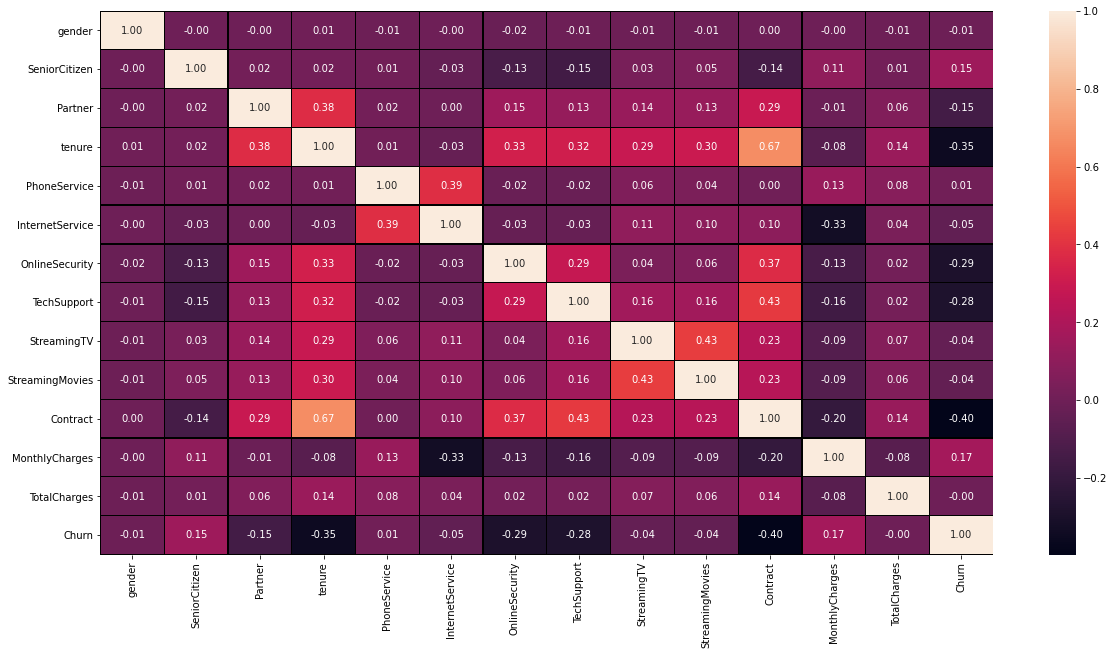

In [76]:
plt.figure(figsize = (20,10))
sns.heatmap(customer.corr(), annot = True, linewidth = .2, linecolor = 'black', fmt ='.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='gender', ylabel='Density'>

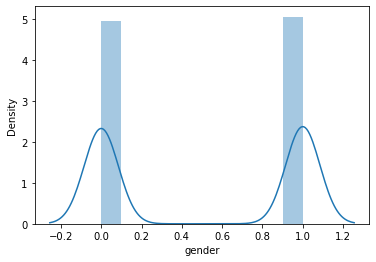

In [39]:
sns.distplot(customer['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

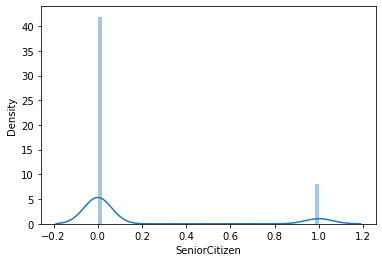

In [40]:
sns.distplot(customer['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

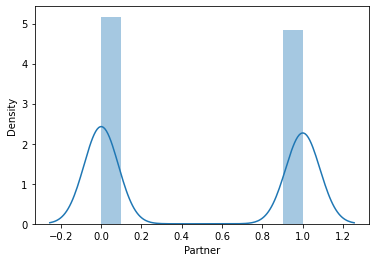

In [41]:
sns.distplot(customer['Partner'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

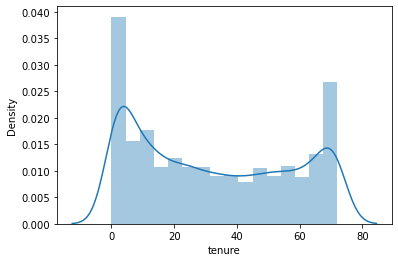

In [43]:
sns.distplot(customer['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

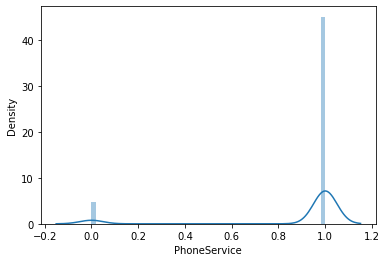

In [44]:
sns.distplot(customer['PhoneService'])

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

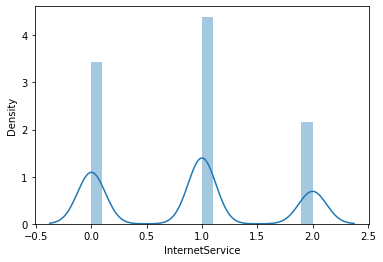

In [45]:
sns.distplot(customer['InternetService'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

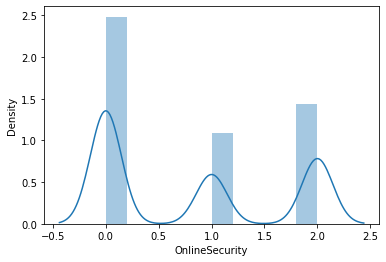

In [46]:
sns.distplot(customer['OnlineSecurity'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

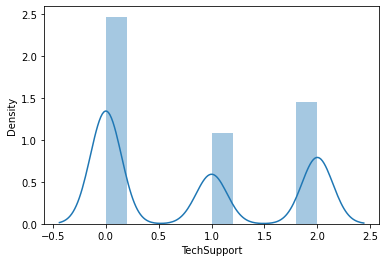

In [47]:
sns.distplot(customer['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

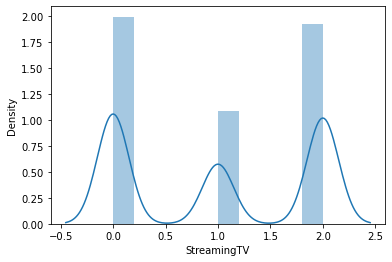

In [48]:
sns.distplot(customer['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

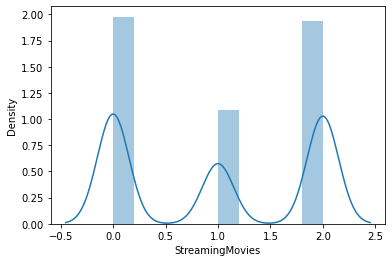

In [49]:
sns.distplot(customer['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

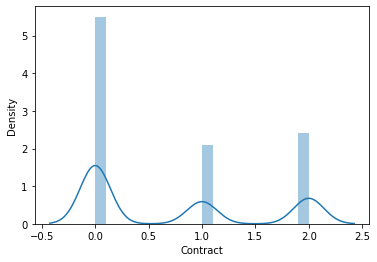

In [50]:
sns.distplot(customer['Contract'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

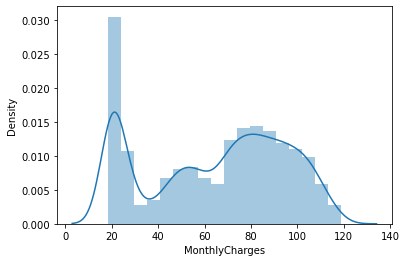

In [51]:
sns.distplot(customer['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

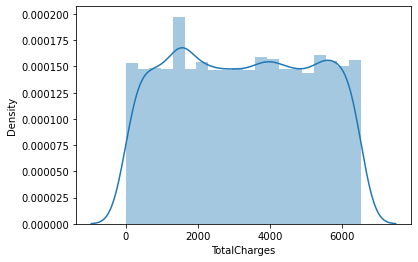

In [52]:
sns.distplot(customer['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

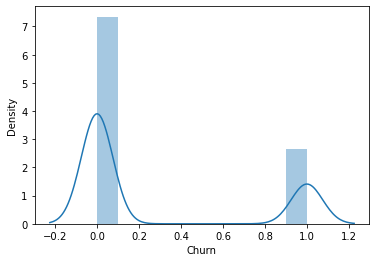

In [53]:
sns.distplot(customer['Churn'])

# Outliers

In [78]:
from scipy.stats import zscore
z = np.abs(zscore(customer))
z

array([[1.00955867, 0.43991649, 1.03453023, ..., 0.7236102 , 0.82066082,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.04038243, 1.42834992,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.09267247, 1.36784408,
        1.66382851],
       ...,
       [1.00955867, 0.43991649, 1.03453023, ..., 0.73434043, 0.53549416,
        0.60102348],
       [0.99053183, 2.27315869, 1.03453023, ..., 0.67775829, 0.73016512,
        1.66382851],
       [0.99053183, 0.43991649, 0.96662231, ..., 1.45112002, 0.87560729,
        0.60102348]])

In [79]:
threshold =3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [80]:
customer_new = customer[(z<3).all(axis=1)]
print(customer.shape)
print(customer_new.shape)

(7043, 14)
(6361, 14)


# Divide Data in Feature & Vector

In [86]:
x = customer.drop(['Churn'], axis =1)
y = customer['Churn']

# Remove Skewness

In [87]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

x = power_transform(customer, method = 'yeo-johnson')
print(x)

sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.00955867 -0.43991649  1.03453023 ... -0.61575548 -0.7305407
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.16127803 -1.54247815
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.0366444  -1.4456225
   1.66382851]
 ...
 [-1.00955867 -0.43991649  1.03453023 ... -0.62800264 -0.41839491
  -0.60102348]
 [ 0.99053183  2.27315869  1.03453023 ...  0.71626994 -0.62845165
   1.66382851]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.6341056   0.87137552
  -0.60102348]]
[[-1.00955867 -0.43991649  1.03453023 ... -0.61575548 -0.7305407
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.16127803 -1.54247815
  -0.60102348]
 [ 0.99053183 -0.43991649 -0.96662231 ...  0.0366444  -1.4456225
   1.66382851]
 ...
 [-1.00955867 -0.43991649  1.03453023 ... -0.62800264 -0.41839491
  -0.60102348]
 [ 0.99053183  2.27315869  1.03453023 ...  0.71626994 -0.62845165
   1.66382851]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.6341056   0.87137552
  -0.60102348]]


# Model

In [89]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = i, test_size = 0.20)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    if round(accuracy_score(y_train, pred_train)*100,1) == round(accuracy_score(y_test, pred_test)*100,1):
        
        print("At random state", i, "The model performs very well")
        print("Random_state:-", i)
        
        print("Training r2_score is:-", accuracy_score(y_train, pred_train)*100)
        
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 0 The model performs very well
Random_state:- 0
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 1 The model performs very well
Random_state:- 1
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 2 The model performs very well
Random_state:- 2
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 3 The model performs very well
Random_state:- 3
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 4 The model performs very well
Random_state:- 4
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 5 The model performs very well
Random_state:- 5
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 6 The model performs very well
Random_state:- 6
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 7 The model performs very well
Random_state:- 7
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 8 The model perf

At random state 68 The model performs very well
Random_state:- 68
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 69 The model performs very well
Random_state:- 69
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 70 The model performs very well
Random_state:- 70
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 71 The model performs very well
Random_state:- 71
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 72 The model performs very well
Random_state:- 72
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 73 The model performs very well
Random_state:- 73
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 74 The model performs very well
Random_state:- 74
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 75 The model performs very well
Random_state:- 75
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 

At random state 136 The model performs very well
Random_state:- 136
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 137 The model performs very well
Random_state:- 137
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 138 The model performs very well
Random_state:- 138
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 139 The model performs very well
Random_state:- 139
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 140 The model performs very well
Random_state:- 140
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 141 The model performs very well
Random_state:- 141
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 142 The model performs very well
Random_state:- 142
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 143 The model performs very well
Random_state:- 143
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 203 The model performs very well
Random_state:- 203
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 204 The model performs very well
Random_state:- 204
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 205 The model performs very well
Random_state:- 205
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 206 The model performs very well
Random_state:- 206
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 207 The model performs very well
Random_state:- 207
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 208 The model performs very well
Random_state:- 208
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 209 The model performs very well
Random_state:- 209
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 210 The model performs very well
Random_state:- 210


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 273 The model performs very well
Random_state:- 273
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 274 The model performs very well
Random_state:- 274
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 275 The model performs very well
Random_state:- 275
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 276 The model performs very well
Random_state:- 276
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 277 The model performs very well
Random_state:- 277
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 278 The model performs very well
Random_state:- 278
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 279 The model performs very well
Random_state:- 279
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 280 The model performs very well
Random_state:- 280


At random state 339 The model performs very well
Random_state:- 339
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 340 The model performs very well
Random_state:- 340
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 341 The model performs very well
Random_state:- 341
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 342 The model performs very well
Random_state:- 342
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 343 The model performs very well
Random_state:- 343
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 344 The model performs very well
Random_state:- 344
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 345 The model performs very well
Random_state:- 345
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 346 The model performs very well
Random_state:- 346
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 407 The model performs very well
Random_state:- 407
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 408 The model performs very well
Random_state:- 408
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 409 The model performs very well
Random_state:- 409
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 410 The model performs very well
Random_state:- 410
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 411 The model performs very well
Random_state:- 411
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 412 The model performs very well
Random_state:- 412
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 413 The model performs very well
Random_state:- 413
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 414 The model performs very well
Random_state:- 414
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


At random state 476 The model performs very well
Random_state:- 476
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 477 The model performs very well
Random_state:- 477
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 478 The model performs very well
Random_state:- 478
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 479 The model performs very well
Random_state:- 479
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 480 The model performs very well
Random_state:- 480
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 481 The model performs very well
Random_state:- 481
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 482 The model performs very well
Random_state:- 482
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 483 The model performs very well
Random_state:- 483
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 545 The model performs very well
Random_state:- 545
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 546 The model performs very well
Random_state:- 546
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 547 The model performs very well
Random_state:- 547
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 548 The model performs very well
Random_state:- 548
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 549 The model performs very well
Random_state:- 549
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 550 The model performs very well
Random_state:- 550
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 551 The model performs very well
Random_state:- 551
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 552 The model performs very well
Random_state:- 552


At random state 616 The model performs very well
Random_state:- 616
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 617 The model performs very well
Random_state:- 617
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 618 The model performs very well
Random_state:- 618
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 619 The model performs very well
Random_state:- 619
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 620 The model performs very well
Random_state:- 620
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 621 The model performs very well
Random_state:- 621
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 622 The model performs very well
Random_state:- 622
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 623 The model performs very well
Random_state:- 623
Training r2_score is:- 100.0
Testing r2_score is:- 100.0


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 687 The model performs very well
Random_state:- 687
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 688 The model performs very well
Random_state:- 688
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 689 The model performs very well
Random_state:- 689
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 690 The model performs very well
Random_state:- 690
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 691 The model performs very well
Random_state:- 691
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 692 The model performs very well
Random_state:- 692
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 693 The model performs very well
Random_state:- 693
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 694 The model performs very well
Random_state:- 694


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 755 The model performs very well
Random_state:- 755
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 756 The model performs very well
Random_state:- 756
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 757 The model performs very well
Random_state:- 757
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 758 The model performs very well
Random_state:- 758
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 759 The model performs very well
Random_state:- 759
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 760 The model performs very well
Random_state:- 760
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 761 The model performs very well
Random_state:- 761
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 762 The model performs very well
Random_state:- 762


Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 825 The model performs very well
Random_state:- 825
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 826 The model performs very well
Random_state:- 826
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 827 The model performs very well
Random_state:- 827
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 828 The model performs very well
Random_state:- 828
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 829 The model performs very well
Random_state:- 829
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 830 The model performs very well
Random_state:- 830
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 831 The model performs very well
Random_state:- 831
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 832 The model performs very well
Random_state:- 832


Random_state:- 892
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 893 The model performs very well
Random_state:- 893
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 894 The model performs very well
Random_state:- 894
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 895 The model performs very well
Random_state:- 895
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 896 The model performs very well
Random_state:- 896
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 897 The model performs very well
Random_state:- 897
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 898 The model performs very well
Random_state:- 898
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 899 The model performs very well
Random_state:- 899
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 900 The model performs very well


Testing r2_score is:- 100.0
At random state 959 The model performs very well
Random_state:- 959
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 960 The model performs very well
Random_state:- 960
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 961 The model performs very well
Random_state:- 961
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 962 The model performs very well
Random_state:- 962
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 963 The model performs very well
Random_state:- 963
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 964 The model performs very well
Random_state:- 964
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 965 The model performs very well
Random_state:- 965
Training r2_score is:- 100.0
Testing r2_score is:- 100.0
At random state 966 The model performs very well
Random_state:- 966
Training r2_score is:- 100.0


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1041
           1       0.28      0.28      0.28       368

    accuracy                           0.63      1409
   macro avg       0.52      0.52      0.52      1409
weighted avg       0.63      0.63      0.63      1409



# Cross Validation Score

In [92]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test, pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    
    print("At cv:-", j)
    print("Cross validation score is:-", lsc*100)
    print("accuracy_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 3
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 4
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 5
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 6
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 7
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 8
Cross validation score is:- 100.0
accuracy_score is:- 100.0


At cv:- 9
Cross validation score is:- 100.0
accuracy_score is:- 100.0




In [93]:
lsscore_selected = cross_val_score(lr,x,y,cv= 2).mean()
print("The cv score is: ", lsscore_selected, "\nThe accuracy score is: ", lss)

The cv score is:  1.0 
The accuracy score is:  1.0


# Naiye Bayes Classification

In [94]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [95]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb, y_test))

1.0


In [96]:
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

[[1041    0]
 [   0  368]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       368

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



# SVC

In [97]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)

SVC()

In [98]:
predsvc = svc.predict(x_test)
print('actual and predicted value score', accuracy_score(y_test, predsvc))

actual and predicted value score 1.0


# KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1041
           1       1.00      0.96      0.98       368

    accuracy                           0.99      1409
   macro avg       0.99      0.98      0.99      1409
weighted avg       0.99      0.99      0.99      1409



# Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)
preddct = dct.predict(x_test)
preddct

array([0, 0, 0, ..., 1, 0, 0])

In [103]:
print(classification_report(y_test, preddct))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       368

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



# AUC ROC Curve

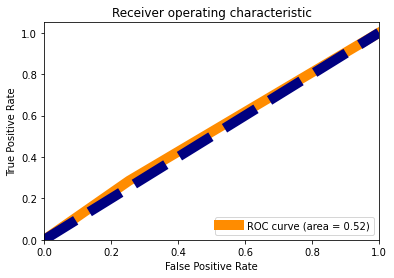

In [104]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy',lw=10,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')

plt.legend(loc = "lower right")
plt.show()

# Model Saving

In [105]:
import pickle
import pickle
filename = 'Customer_Churn_project.pkl'
pickle.dump(svc, open(filename, 'wb'))